In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def mse(seq_out,seq_target):
    return np.mean((seq_out - seq_target) ** 2)
    
def reconstructe(signal,top=10):
    fs = len(signal)
    freqs = np.fft.fftfreq(len(signal), 1/fs)
    fft_values = np.fft.fft(signal)
    fft_abs = np.abs(fft_values)
    top_indices = np.argsort(fft_abs)[::-1][:top]
    top_freqs = freqs[top_indices]
    top_amp = fft_abs[top_indices]
    reconstructed_signal = top_fft_values * np.exp(1j * top_freqs)
    return reconstructed_signal,top_fft_values,top_freqs

def encoder(seq):
    fs = len(seq)
    freqs = np.fft.fftfreq(len(signal), 1/fs)
    fft_values = np.fft.fft(signal)
    fft_abs = np.abs(fft_values)
    top_indices = np.argsort(fft_abs)[::-1][:10]
    return fft_values,top_indices

def decoder(fft_values,mask_pred,pred_len):
    reconstructed_fft_values = np.zeros((pred_len,2))
    reconstructed_fft_values[mask_pred] = fft_values[mask_pred]
    reconstructed_signal = np.fft.ifft(reconstructed_fft_values)
    return reconstructed_signal.real

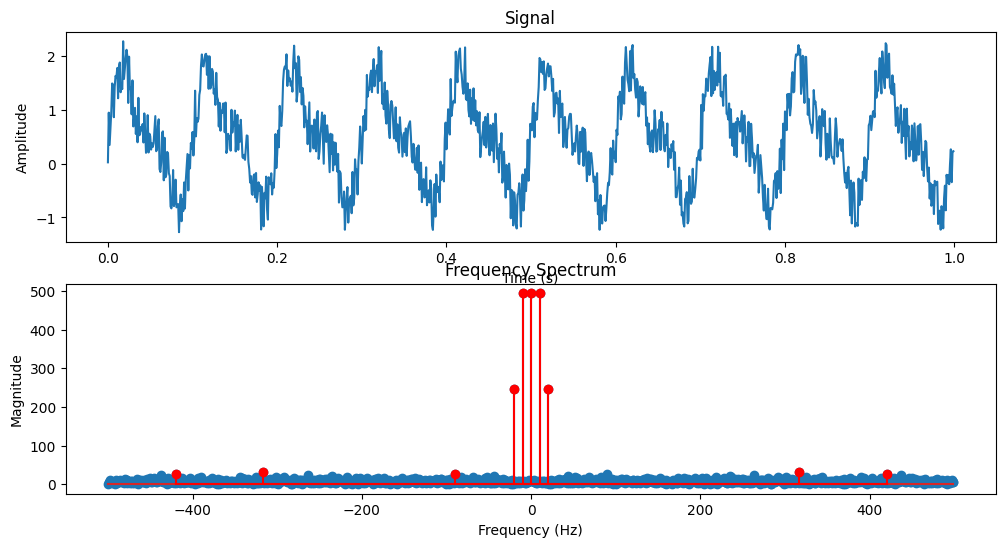

Top 10 frequencies: [ -10.   10.    0.   20.  -20. -317.  317.  420. -420.  -90.]


In [25]:


# 生成示例信号
fs = 1000  # 采样率
t = np.linspace(0, 1, fs, endpoint=False)  # 1秒钟的信号
f1 = 10  # 频率为10Hz的信号
f2 = 20  # 频率为20Hz的信号
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)
signal += np.random.rand(fs)

# 计算傅里叶变换
freqs = np.fft.fftfreq(len(signal), 1/fs)
fft_values = np.fft.fft(signal)

# 计算频率强度
fft_abs = np.abs(fft_values)

# 选择前10个频率
top_indices = np.argsort(fft_abs)[::-1][:10]
top_freqs = freqs[top_indices]
top_fft_values = fft_values[top_indices]

# 绘制信号及其频谱
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.stem(freqs, fft_abs)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# 标记前10个频率
plt.stem(top_freqs, np.abs(top_fft_values), linefmt='r-', markerfmt='ro', basefmt='r-')
plt.show()

print("Top 10 frequencies:", top_freqs)


In [26]:
reconstructe(signal)

(array([-2.62566925e+02-418.46482372j, -2.62566925e+02+418.46482372j,
         4.93769164e+02  +0.j        ,  2.24179505e+02-100.6943671j ,
         2.24179505e+02+100.6943671j ,  2.76500618e+01 -14.23247129j,
         2.76500618e+01 +14.23247129j, -2.53498590e+01 +10.09527234j,
        -2.53498590e+01 -10.09527234j, -1.34308100e-01 -25.08308327j]),
 array([-7.34126738e+00+493.96386949j, -7.34126738e+00-493.96386949j,
         4.93769164e+02  +0.j        , -4.44809676e-01-245.75517918j,
        -4.44809676e-01+245.75517918j, -2.21904447e+01 +21.78699882j,
        -2.21904447e+01 -21.78699882j, -2.26056472e+01 -15.28118423j,
        -2.26056472e+01 +15.28118423j,  2.24843727e+01 +11.11899683j]),
 array([ -10.,   10.,    0.,   20.,  -20., -317.,  317.,  420., -420.,
         -90.]))

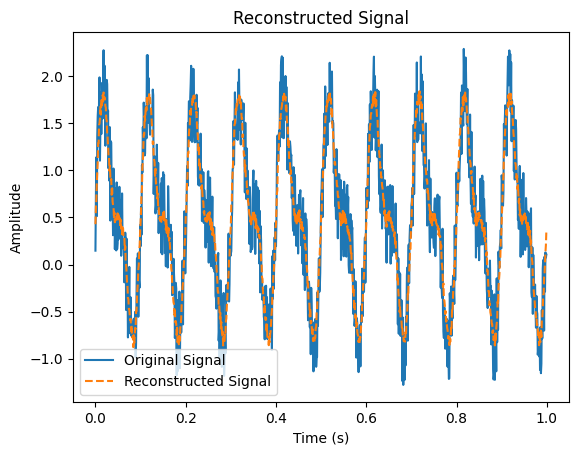

In [20]:
# 将其余频率设为0，只保留前10个频率
reconstructed_fft_values = np.zeros_like(fft_values)
reconstructed_fft_values[top_indices] = fft_values[top_indices]

# 进行逆傅里叶变换
reconstructed_signal = np.fft.ifft(reconstructed_fft_values)

# 绘制重建的信号
plt.figure()
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal.real, label='Reconstructed Signal', linestyle='--')
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [4]:
mse(reconstructed_signal.real,signal)

0.0748520055935242

In [5]:
data = pd.read_csv('./ETTm2.csv')
ot = data["OT"].values

In [6]:
data = pd.read_csv('./ETTm2.csv')
ot = data["OT"].values
start_i = 0
in_len = 96
out_len = 96
seq_in = ot[start_i:start_i+in_len]
seq_target = ot[start_i+in_len:start_i+in_len+out_len]

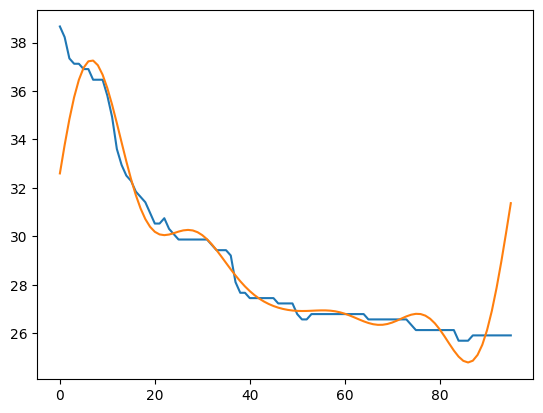

In [30]:
plt.plot(seq_in)
plt.plot(reconstructe(seq_in))

In [18]:
encoder(seq_in)

(array([ 5.03551912e+02+0.00000000e+00j, -2.86068195e+00-8.15928284e+00j,
         4.10449863e+00+1.21216803e+01j, -2.73264129e+00+2.69743175e+00j,
        -1.58989195e+00-1.08650552e+01j,  7.69864049e+00-4.62382175e-01j,
        -6.94779874e-01+9.59801011e+00j,  4.35516589e+00+3.15090358e+00j,
        -4.54192154e+00+4.60228141e+00j,  7.49392206e+00+1.02410556e+00j,
        -3.37686681e+00-4.99749642e+02j, -8.72906975e-01-3.09609984e+00j,
         1.06891865e+00-1.41556188e+00j,  4.73336496e+00+2.87463422e+00j,
        -4.60533738e+00-4.36894884e+00j, -4.92255763e+00-3.51880739e+00j,
         9.15451075e+00+3.08386762e+00j,  5.50026168e+00-1.34862371e+01j,
        -3.63252277e+00+3.00435051e+00j,  2.04289538e+00+7.09624982e+00j,
         2.40508235e+00-2.56474062e+02j, -7.46618718e-02-4.19742836e-01j,
         1.25126820e+01+3.26013593e+00j, -1.14722939e+01+4.44982769e-01j,
        -2.01154409e+00+5.69864233e+00j, -4.49690678e+00-4.74115847e+00j,
        -3.46394856e+00+4.18794777e+00